In [1]:
import rasterio
import numpy as np
import cv2

In [2]:
fp = "Connecticut_20230706_01.tif"
dataset = rasterio.open(fp)
data = dataset.read()

In [3]:
img = np.transpose(data, (1,2,0))[:,:,:3]

In [4]:
x_splits = np.array_split(img, 4, axis=0)
ctr = 1
out_img = None
for x_split in x_splits:    # Split big image into 16 smaller images. Then segment each one, and concatenate into one big image
    xy_splits = np.array_split(x_split, 4, axis=1)
    vert_img = None
    for samp_img in xy_splits:
        print(ctr, samp_img.shape)
        ctr += 1

        # TODO: Process samp_img here (pred_img is the water mask)
        nonzero_img = (np.sum(samp_img, axis=-1) > 0).astype(int)
        pred_img = samp_img[:]

        if vert_img is None:
            vert_img = np.zeros_like(pred_img)
            vert_img[:] = pred_img[:]
        else:
            vert_img = np.concatenate((vert_img, pred_img), axis=1)
    if out_img is None:
        out_img = vert_img
    else:
        out_img = np.concatenate((out_img, vert_img), axis=0)

1 (3553, 3454, 3)
2 (3553, 3454, 3)
3 (3553, 3454, 3)
4 (3553, 3454, 3)
5 (3553, 3454, 3)
6 (3553, 3454, 3)
7 (3553, 3454, 3)
8 (3553, 3454, 3)
9 (3553, 3454, 3)
10 (3553, 3454, 3)
11 (3553, 3454, 3)
12 (3553, 3454, 3)
13 (3552, 3454, 3)
14 (3552, 3454, 3)
15 (3552, 3454, 3)
16 (3552, 3454, 3)


In [5]:
nonzero_img = (np.sum(samp_img, axis=-1) > 0).astype(int)
nonzero_img.shape, np.max(nonzero_img), np.min(nonzero_img)

((3552, 3454), 1, 0)

In [6]:
samp_img.shape, np.max(samp_img), np.min(samp_img)

((3552, 3454, 3), 254, 0)

In [7]:
data.shape
im1 = img[:3500, :3400]
im2 = img[3500:7000, 3400:6800]
im3 = img[7000:10500, 6800:10200]
im4 = img[10500:, 10200:]

In [8]:

from lang_sam import LangSAM
from PIL import Image

/home/rdaroya_umass_edu/miniconda3/envs/lsa/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
text_prompt = "water"
image_pil = Image.fromarray(np.uint8(im4))
image_pil.size

(3616, 3711)

In [12]:

im_small = image_pil.resize((300,300))
im_small.size

(300, 300)

In [10]:

model = LangSAM()

/home/rdaroya_umass_edu/miniconda3/envs/lsa/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402379298/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased
Model loaded from /home/rdaroya_umass_edu/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


/home/rdaroya_umass_edu/miniconda3/envs/lsa/lib/python3.8/site-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/rdaroya_umass_edu/miniconda3/envs/lsa/lib/python3.8/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


OutOfMemoryError: CUDA out of memory. Tried to allocate 1024.00 MiB (GPU 0; 10.91 GiB total capacity; 5.48 GiB already allocated; 964.12 MiB free; 5.62 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [13]:
masks, boxes, phrases, logits = model.predict(im_small, text_prompt)

/home/rdaroya_umass_edu/miniconda3/envs/lsa/lib/python3.8/site-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/rdaroya_umass_edu/miniconda3/envs/lsa/lib/python3.8/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


OutOfMemoryError: CUDA out of memory. Tried to allocate 1024.00 MiB (GPU 0; 10.91 GiB total capacity; 4.61 GiB already allocated; 964.12 MiB free; 5.62 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [5]:
s1, s2, _ = img.shape
s1,s2

(14211, 13816)

In [13]:
6800+3400

10200

In [6]:
14211/4, 13816/4

(3552.75, 3454.0)

In [7]:
np.max(img), np.min(img)

(254, 0)

In [22]:

from PIL import Image
im = Image.fromarray(np.uint8(img))

In [26]:
im_small = im.resize((3000,3000))

In [33]:
im_small_np = np.array(im_small)
img_input = im_small_np
im_small_np.shape

(3000, 3000, 3)

In [23]:
im2 = Image.fromarray(np.uint8(img[2000:5000, 7000:10000,:]))

In [12]:
np.sum(im1)/(3500*3400)

2.134643613445378

In [11]:
im1.shape

(3500, 3400, 3)

In [8]:
import matplotlib.pyplot as plt

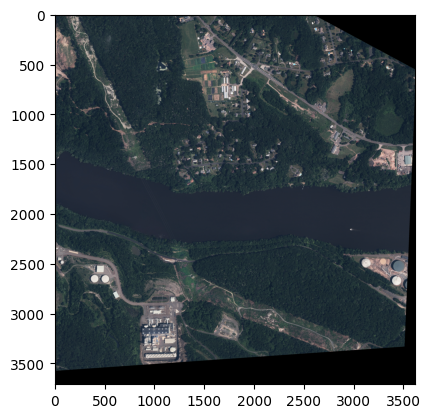

In [17]:
plt.imshow(im4)

In [9]:
# predictor.set_image(img[:])

In [18]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [19]:
masks = mask_generator.generate(im4)

/scratch/workspace/rdaroya_umass_edu-water/segment-anything/segment_anything/utils/amg.py:118: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370131125/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  change_indices = diff.nonzero()


In [20]:
# np.sum(img_input*np.reshape(masks[5]["segmentation"], (3000,3000,1)))

In [67]:
len(masks)

90

In [21]:
max_val = 0
max_i = 0
for i, val in enumerate(masks[:]):
    mask_samp = val["segmentation"]
    num_px = np.sum(mask_samp)
    if num_px > max_val:
        max_val = num_px
        max_mask = val
        max_i = i

In [22]:
max_val, max_mask, max_i

(3076925,
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 3076925,
  'bbox': [0, 0, 3615, 3710],
  'predicted_iou': 0.9905499219894409,
  'point_coords': [[960.5, 3537.046875]],
  'stability_score': 0.9644649624824524,
  'crop_box': [0, 0, 3616, 3711]},
 4)

In [23]:
mask_i = max_mask["segmentation"].astype(int)

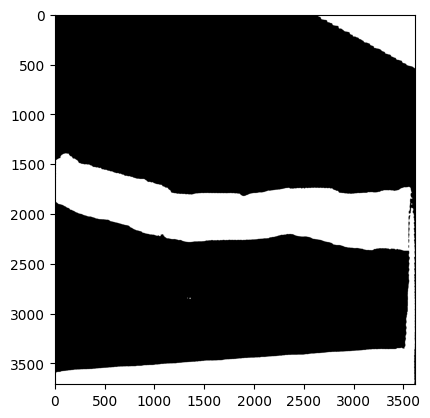

In [24]:
plt.imshow(mask_i, cmap='gray')